# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Felix Winston
- Email: felixlim140@gmail.com
- Id Dicoding: felixwlimz

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [35]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from joblib import load 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

### Menyiapkan data yang akan diguankan

## Data Understanding

In [3]:
# Baca file dari CSV 
df = pd.read_csv('data.csv', sep=';')
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [4]:
# Describe shape 
df.shape

(4424, 37)

Data Tersebut berjumlah 4424 baris dan 37 kolom

In [5]:
# Check for unique values
df.nunique()

Marital_status                                    6
Application_mode                                 18
Application_order                                 8
Course                                           17
Daytime_evening_attendance                        2
Previous_qualification                           17
Previous_qualification_grade                    101
Nacionality                                      21
Mothers_qualification                            29
Fathers_qualification                            34
Mothers_occupation                               32
Fathers_occupation                               46
Admission_grade                                 620
Displaced                                         2
Educational_special_needs                         2
Debtor                                            2
Tuition_fees_up_to_date                           2
Gender                                            2
Scholarship_holder                                2
Age_at_enrol

In [6]:
# Check for missing values 
df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


Data tersebut tidak ada data yang kosong 

In [7]:
# Check for duplicates
df.duplicated().sum()

0

Data tersebut tidak duplikat

In [8]:
# Describe data 
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

## EDA - Univariate

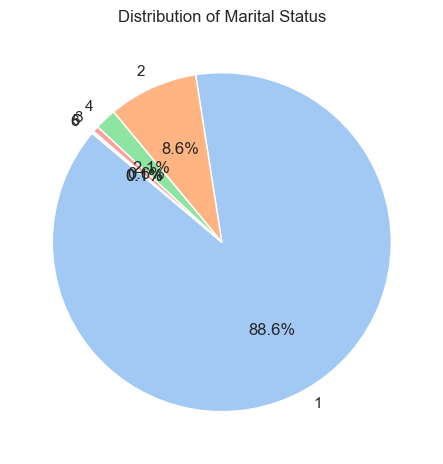

In [55]:
# Plot by Martial Status 
sns.set(style="whitegrid")
plt.pie(df['Marital_status'].value_counts(),
        labels=df['Marital_status'].unique(),
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette("pastel"))
plt.title('Distribution of Marital Status')
plt.tight_layout()
plt.show()


Dari distribusi status pernikahan di atas, mayoritas mahasiswa belum menikah, yaitu sekitar 88.6%

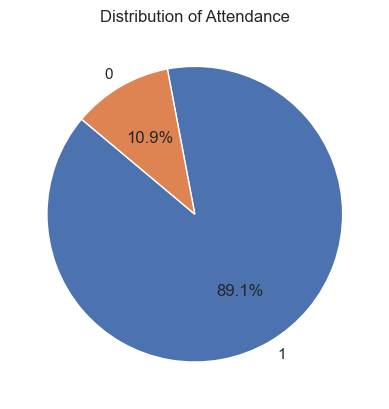

In [11]:
# Count by attendance in daytime or evening 
plt.pie(df['Daytime_evening_attendance'].value_counts(), labels=df['Daytime_evening_attendance'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Attendance')
plt.show()

Berdasarkan jumlah kehadiran, 89.1% mahasiswa berkuliah di sore hari, sedangkan sekitar 10.9% berkuliah di pagi hari

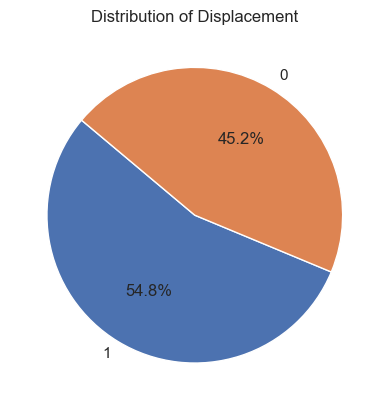

In [12]:
# Count by displacement 

plt.pie(df['Displaced'].value_counts(), labels=df['Displaced'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Displacement')
plt.show()


Berdasarkan grafik diatas, 54.8% mahasiswa merupakan mahasiswa pindahan

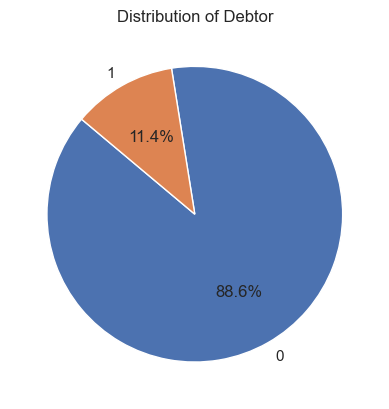

In [13]:
# Count by Debtor 
plt.pie(df['Debtor'].value_counts(), labels=df['Debtor'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Debtor')
plt.show()

Dari data diatas, 11.4% mahasiswa merupakan peminjam

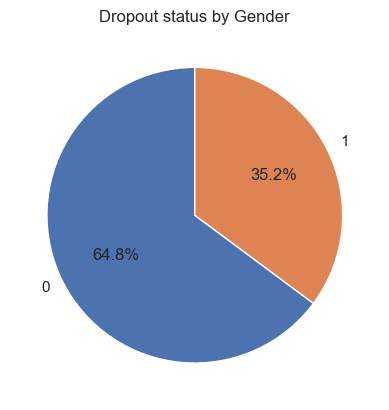

In [14]:
# Dropout status by gender 

plt.pie(x=df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct='%1.1f%%', startangle=90)  
plt.title('Dropout status by Gender')
plt.show()

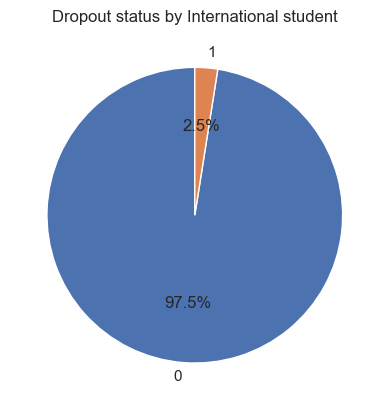

In [15]:
# Dropout status by International student
plt.pie(x=df['International'].value_counts(), labels=df['International'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Dropout status by International student')
plt.show()

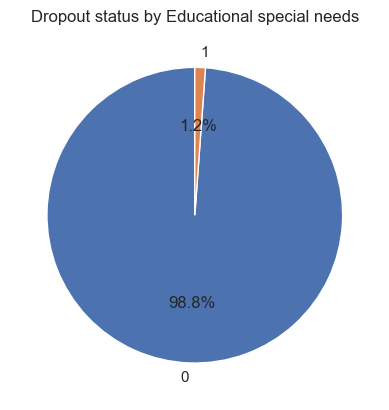

In [16]:
# Educational Special needs 
plt.pie(x=df['Educational_special_needs'].value_counts(), labels=df['Educational_special_needs'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Dropout status by Educational special needs')
plt.show()

Data diatas menunjukkan bahwa 1.2% mahasiswa yang dropout merupakan penerima bantuan khusus perkuliahan

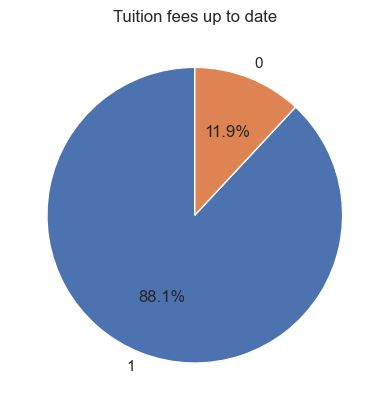

In [17]:
# Tution fees up to date

plt.pie(x=df['Tuition_fees_up_to_date'].value_counts(), labels=df['Tuition_fees_up_to_date'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Tuition fees up to date')
plt.show()

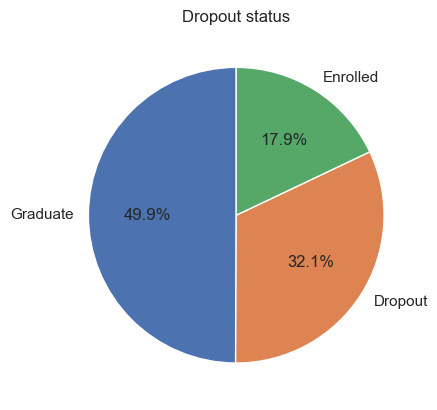

In [18]:
# Student Status ( Target )
plt.pie(x=df['Status'].value_counts(), labels=df['Status'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Dropout status')
plt.show()

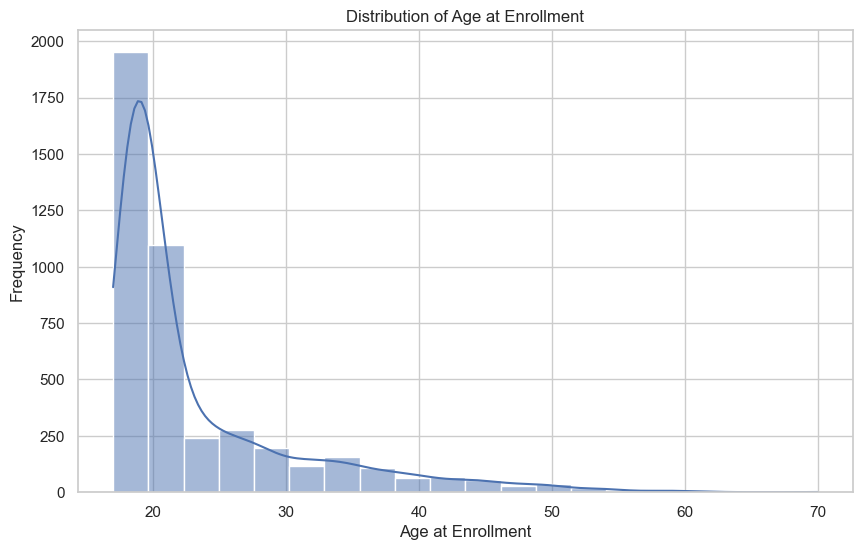

In [19]:
# Distribution of age at enrollment 

plt.figure(figsize=(10, 6))
sns.histplot(df['Age_at_enrollment'], bins=20, kde=True)
plt.title('Distribution of Age at Enrollment')
plt.xlabel('Age at Enrollment')
plt.ylabel('Frequency')
plt.show()

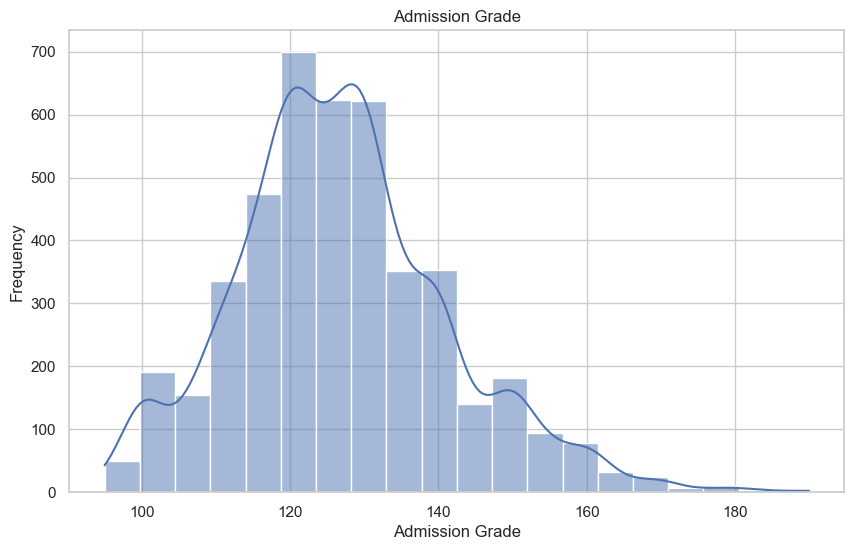

In [20]:
# Admission grade 
plt.figure(figsize=(10, 6))
sns.histplot(df['Admission_grade'], bins=20, kde=True)
plt.title('Admission Grade')
plt.xlabel('Admission Grade')
plt.ylabel('Frequency')
plt.show()

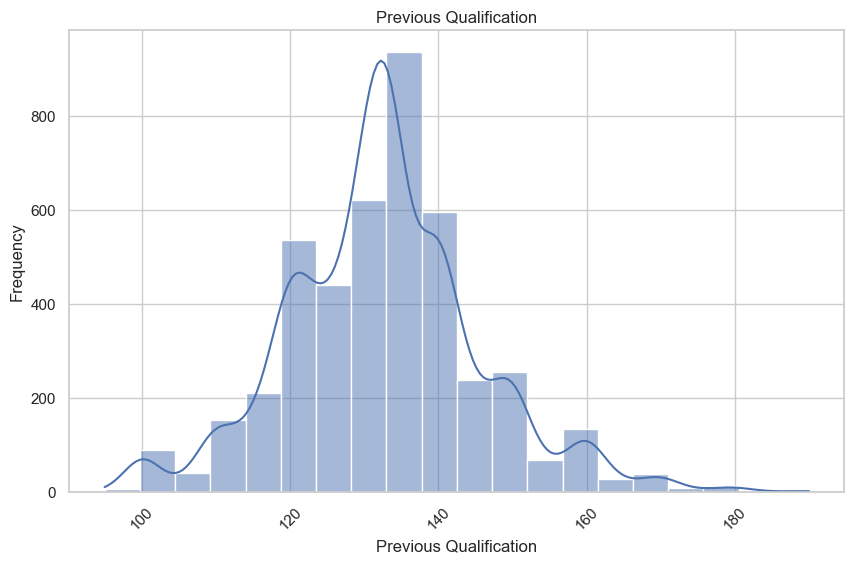

In [21]:
# Previous qualification
plt.figure(figsize=(10, 6))
sns.histplot(df['Previous_qualification_grade'], bins=20, kde=True)
plt.title('Previous Qualification')
plt.xlabel('Previous Qualification')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## EDA - Multivariate 

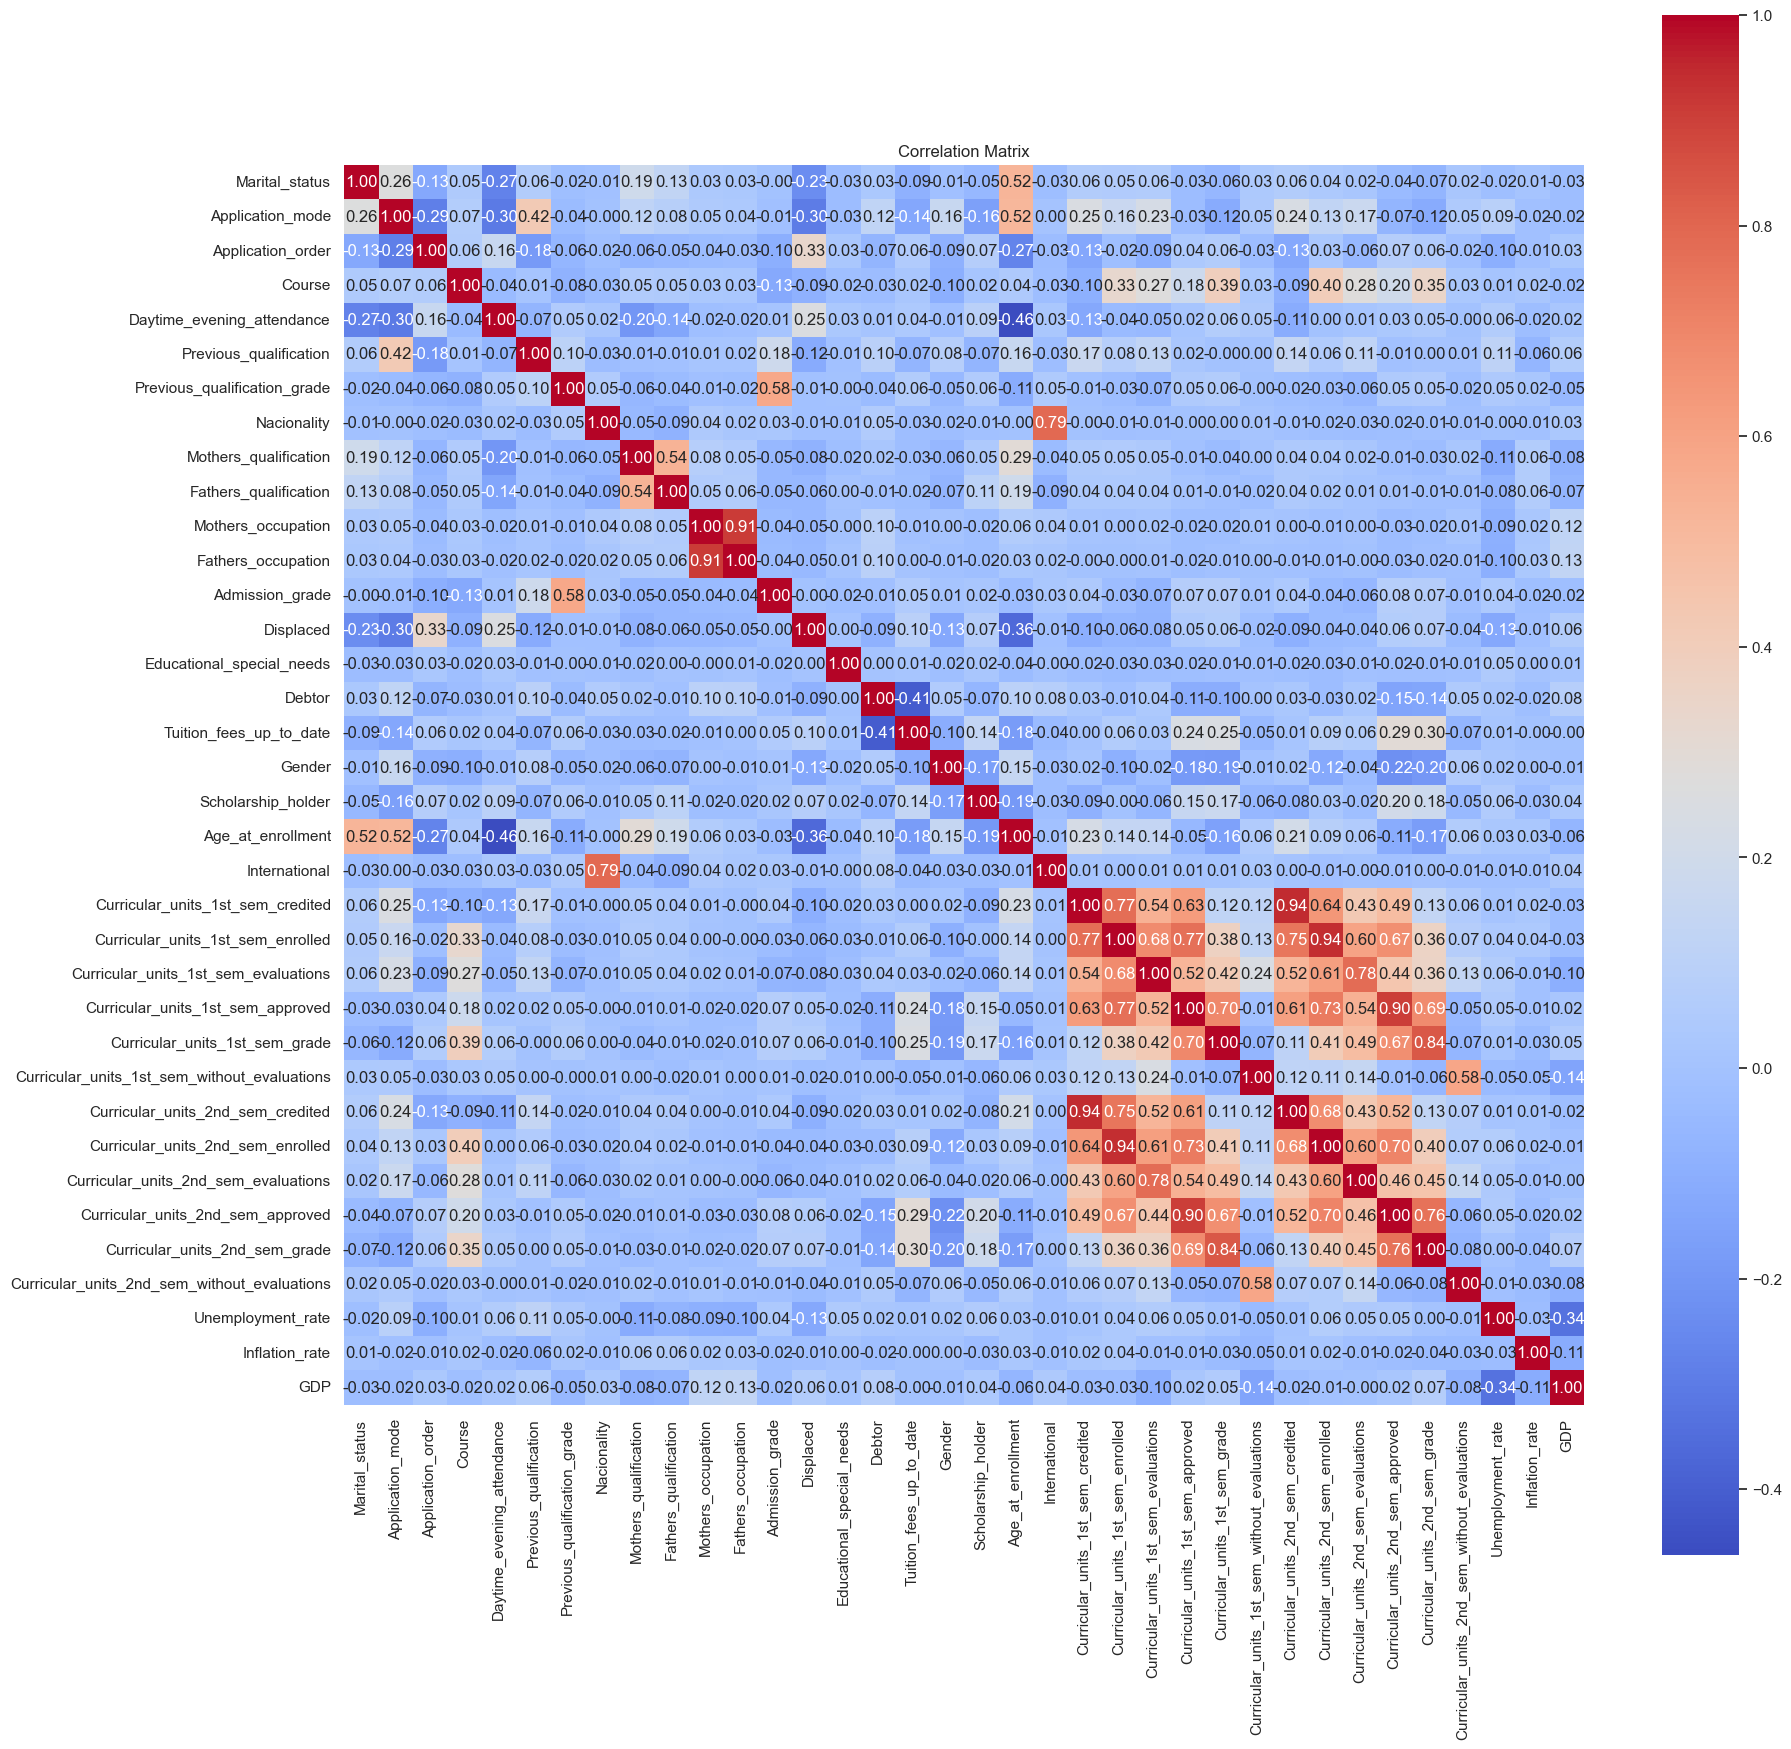

In [22]:
# Checking correlation between features
plt.figure(figsize=(20, 20))

df_copy = df.drop(columns='Status')

sns.heatmap(df_copy.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

## Data Preparation / Preprocessing

In [23]:
# Check for missing values 
df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [24]:
# Check for duplicate values 
df.duplicated().sum()

0

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [26]:
# Convert categorical variables to numerical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
label_encoder = LabelEncoder()

df['Status'] = label_encoder.fit_transform(df['Status'])

# Normalize the data
scaler = StandardScaler()
scaler.fit_transform(df)

# Split the data into features and target variable
X = df.drop(columns=['Status'])
y = df['Status']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Modeling

Logistic Regression Accuracy: 0.7016949152542373
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.67      0.72       316
           1       0.40      0.23      0.29       151
           2       0.72      0.89      0.79       418

    accuracy                           0.70       885
   macro avg       0.63      0.60      0.60       885
weighted avg       0.68      0.70      0.68       885



/opt/anaconda3/envs/credit-scoring/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


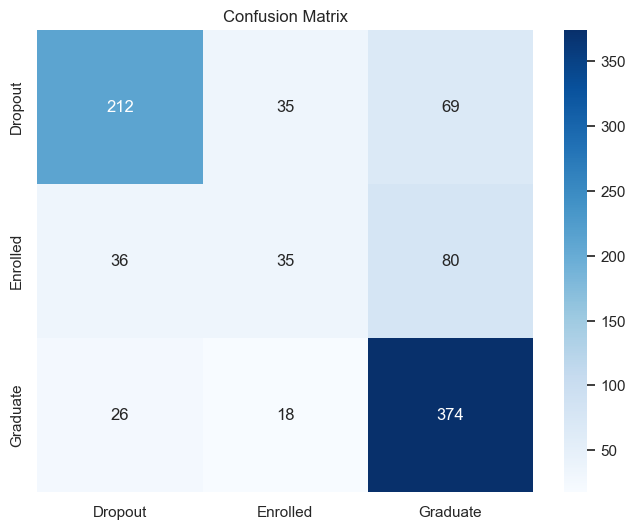

In [28]:
# Use Logistic Regression as baseline model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.show()

Random Forest Accuracy: 0.7615819209039548
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       316
           1       0.48      0.28      0.35       151
           2       0.76      0.93      0.84       418

    accuracy                           0.76       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.74      0.76      0.74       885



Text(0.5, 1.0, 'Confusion Matrix - Random Forest')

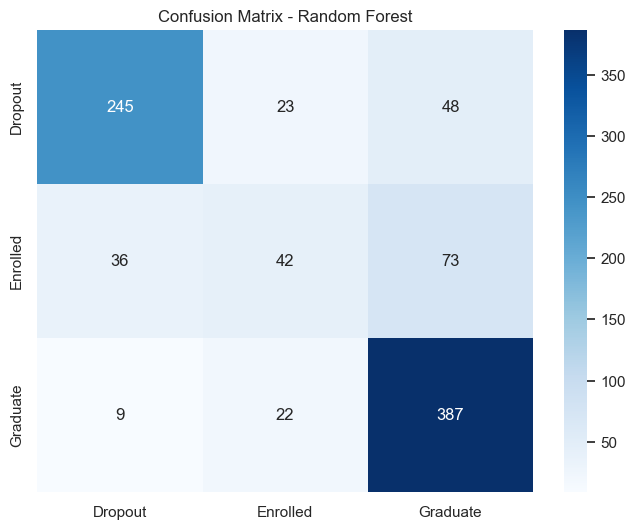

In [29]:
# Using Other Models - Random Forest 
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Random Forest')

In [30]:
%pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


SVC Accuracy: 0.7548022598870057
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79       316
           1       0.49      0.23      0.31       151
           2       0.76      0.93      0.84       418

    accuracy                           0.75       885
   macro avg       0.69      0.64      0.65       885
weighted avg       0.73      0.75      0.73       885



Text(0.5, 1.0, 'Confusion Matrix - SVC')

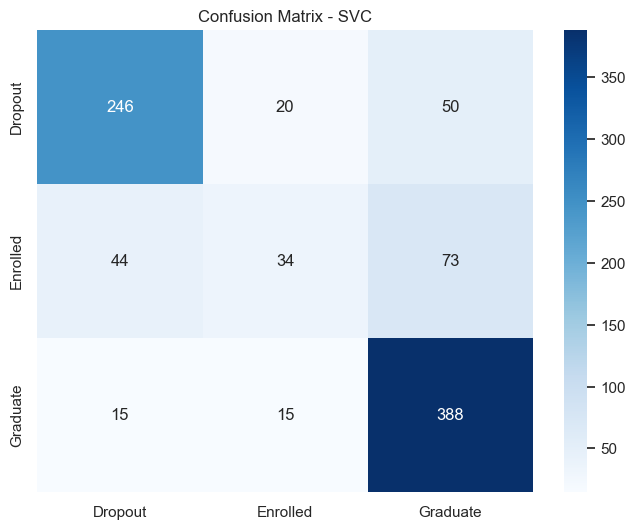

In [32]:
# Using Other Models - XGBoost
from sklearn.svm import SVC
svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

# Evaluate the SVC model
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_svc))
# Confusion Matrix for SVC
cm_svc = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - SVC')


In [44]:
# Use Deep Learning Model

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')   # Assuming binary classification for dropout status
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.summary()

/opt/anaconda3/envs/credit-scoring/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 128)            │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,939 (62.26 KB)

 Trainable params: 15,555 (60.76 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2980 - loss: 1.6312 - val_accuracy: 0.5071 - val_loss: 1.1603
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4337 - loss: 1.1288 - val_accuracy: 0.3150 - val_loss: 1.2994
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5176 - loss: 1.0791 - val_accuracy: 0.3150 - val_loss: 1.2964
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5785 - loss: 0.9904 - val_accuracy: 0.3150 - val_loss: 1.8581
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6364 - loss: 0.9000 - val_accuracy: 0.3150 - val_loss: 2.1324
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6736 - loss: 0.8361 - val_accuracy: 0.3150 - val_loss: 2.3330
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6689 - loss: 0.8150 - val_accuracy: 0.3150 - val_loss: 2.2508
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6934 - loss: 0.7692 - val_accuracy: 0.3150 - v

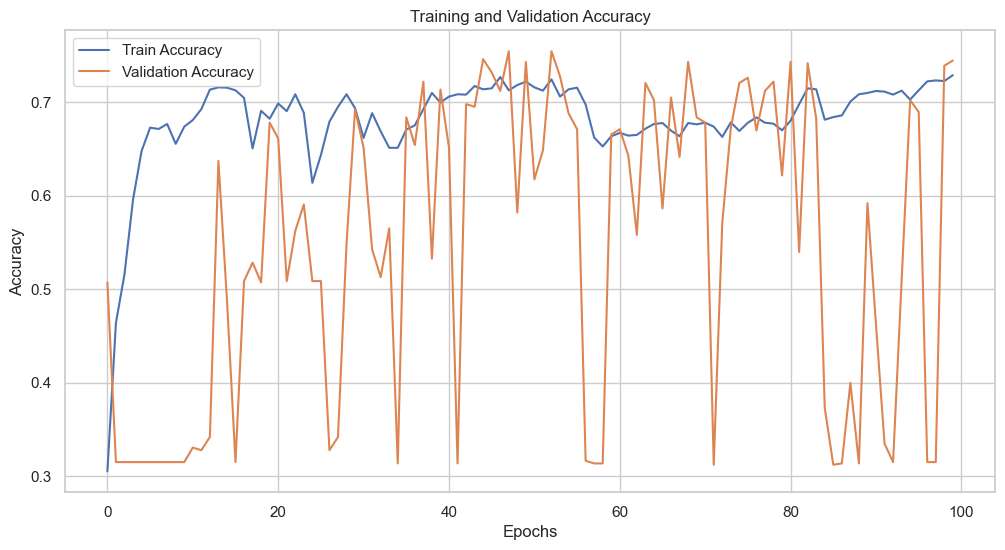

In [45]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Evaluation

In [51]:
# Use pd Dataframe for checking the accuracy of the models
from sklearn.metrics import f1_score

results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVC', 'Deep Learning'],
    'Accuracy': [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_svc), accuracy],
    'F1 Score': [f1_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred_rf, average='weighted'), f1_score(y_test, y_pred_svc, average='weighted'), f1_score(y_test, model.predict(X_test).argmax(axis=1), average='weighted')],
})
results = results.sort_values(by='Accuracy', ascending=False)
results

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step


,Model,Accuracy,F1 Score
1,Random Forest,0.761582,0.743720
2,SVC,0.754802,0.730156
3,Deep Learning,0.737853,0.666977
0,Logistic Regression,0.701695,0.682017
